# Exercise 3 - Sort distances for K-nearest-neighbours classifier

## First, run the below cell in order to install all the relevant libraries.

In [1]:
%pip install numpy
%pip install matplotlib
%pip install sklearn
%pip install scipy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3.13 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ..

## What you should implement

Below is given the bubble-sort implementation of the sorting function we want. It should return the K closest distances in sorted order.

In [2]:
def k_nearest_bubble_sort(array, K):
    size = len(array)
    for i in range(size):
        min_idx = i
        for j in range(i+1, size):
            if array[j] < array[min_idx]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]
    return array[:K]

In [4]:
def merge(arr, k):
    if len(arr)<= 1:
        return arr
    
    mid = len(arr) // 2
    right_arr = arr[:mid]
    left_arr = arr[mid:]
    sorted_right = merge(right_arr, k)
    sorted_left = merge(left_arr, k)
    return k_nearest_mergesort(sorted_right, sorted_left, k)

def k_nearest_mergesort(left, right, k):
    res = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            res.append(left[i])
            i += 1
        else:
            res.append(right[j])
            j += 1
    res.extend(left[i:])
    res.extend(right[j:])
    return res[:k]


In [5]:
def k_nearest_insertionsort(array, K):
    size = len(array)
    for i in range(size):
        j = i
        while j > 0:
            if array[j] < array[j - 1]:
                array[j], array[j - 1] = array[j - 1], array[j]
            j -= 1
    return array[:K]


### Compare the speed

Once we have implemented the above and made sure it is correct, we can see the difference in speed for ourselves.

In [19]:
import random

# Change these parameters and see how the performance changes.
# Can you get formulas for the complexity of your algorithms?
K = 7
max_dist = 10000
num_points = 1000
array = [random.randint(0, max_dist) for i in range(num_points)]

%timeit k_nearest_bubble_sort(array, K)
%timeit merge(array, K)
# We only copy the array here because timeit calls this function several times
%timeit k_nearest_insertionsort(array.copy(), K)

16.6 ms ± 90 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
798 μs ± 11.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[20, 28, 44, 50, 58, 72, 108, 111, 118, 126, 148, 149, 150, 153, 185, 186, 187, 215, 231, 242, 246, 254, 270, 275, 318, 331, 345, 355, 357, 358, 364, 364, 368, 374, 375, 409, 420, 430, 436, 458, 470, 559, 560, 568, 575, 581, 586, 590, 592, 594, 656, 656, 659, 668, 672, 676, 680, 682, 703, 720, 728, 778, 793, 795, 795, 800, 801, 806, 818, 840, 842, 854, 865, 880, 881, 902, 909, 909, 925, 931, 932, 936, 941, 947, 948, 969, 982, 1000, 1002, 1010, 1017, 1022, 1024, 1030, 1033, 1042, 1043, 1051, 1062, 1072, 1073, 1076, 1086, 1105, 1109, 1130, 1142, 1165, 1174, 1194, 1197, 1201, 1206, 1214, 1226, 1231, 1235, 1257, 1282, 1288, 1300, 1316, 1333, 1340, 1343, 1343, 1349, 1354, 1357, 1377, 1389, 1391, 1400, 1404, 1413, 1417, 1454, 1455, 1463, 1472, 1475, 1478, 1485, 1492, 1505, 1508, 1521, 1523, 1524, 1531, 1579, 1624, 1642, 1650, 1656, 1662, 1663, 1668, 1

## Dividing space into partitions

We will use our efficient implementation of sorting to create a K-nearest-neighbour (KNN) classifier. We first generate some data that represents measurements of the weight and size of various apples. Each apple comes from one of three different types - red, green, yellow. We will want to guess a type for the grid of gray points shown below.

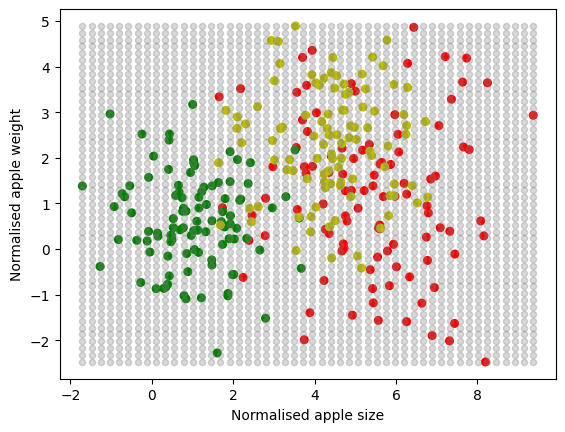

In [1]:
from lab3_helpers import generate_data, plot_grid

# You can change these parameters to generate new datasets
seed = 0
num_classes = 3
num_points_per_class = 100

data, labels = generate_data(num_classes, num_points_per_class, seed)
colours = ['r', 'g', 'y', 'b', 'teal']
x, y = data[:, 0], data[:, 1]

plot_grid(x, y, colours, labels)

Below we use the provided `knn` function to do just that. The KNN classifier finds the K closest points to our point of interest and uses majority voting to decide what label to assign it. That is, if K=3 and we have the three closest point being \[red, red, blue\], then KNN says that this apple is red.

It currently uses the slow `k_nearest_bubble_sort` sorting algorithm. You can run the cell and see how long it takes. You should replace it with your implementation of `merge_sort` and `insertion_sort` and compare the speed.

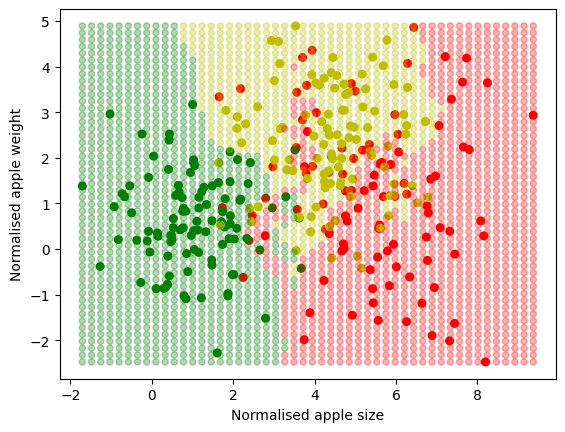

In [8]:
from lab3_helpers import get_grid, knn

# You can change this to see how it affects the partition of the space
K = 7

new_data = get_grid(x, y)

# TODO: replace k_nearest_bubble_sort with your implementations
preds = knn(data, labels, new_data, K, 10, sort_function=merge)

plot_grid(x, y, colours, labels, preds)

## Recognising hand-written digits

We first load a dataset of digits. This will take a few minutes to load the first time you run this cell.

In [1]:
from lab3_helpers import get_image_data, knn, plot_images

X_train, X_test, y_train, y_test = get_image_data(num_train=3000, num_test=40)

Let's see what some of these digits look like.

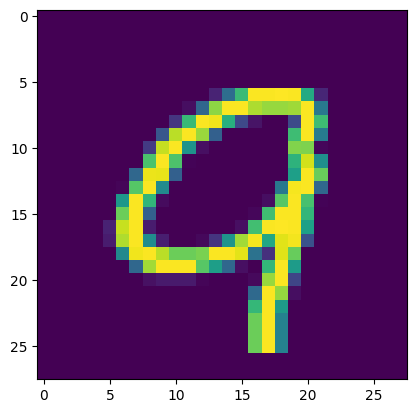

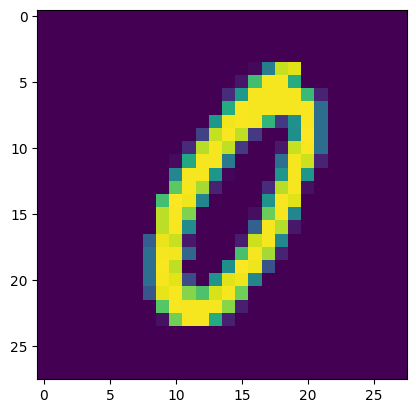

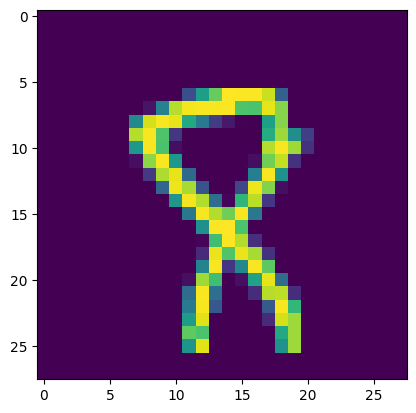

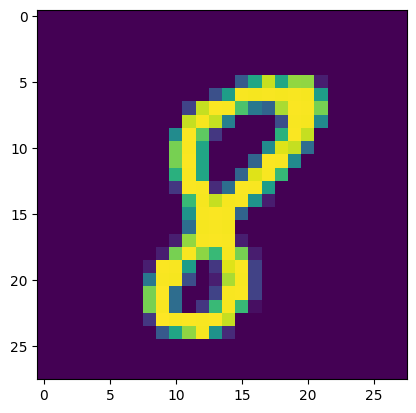

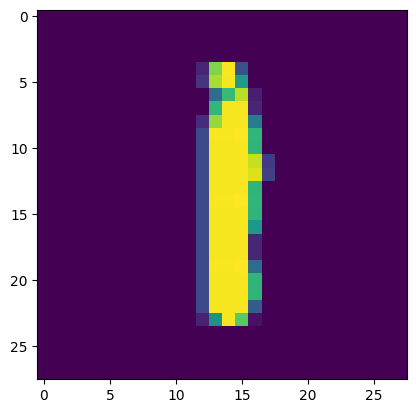

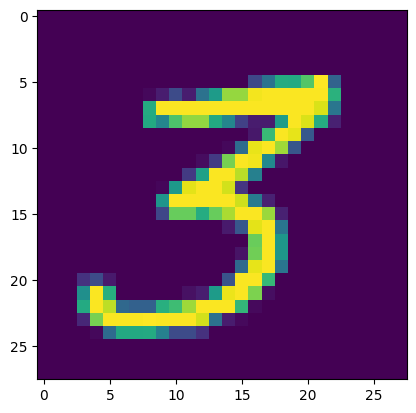

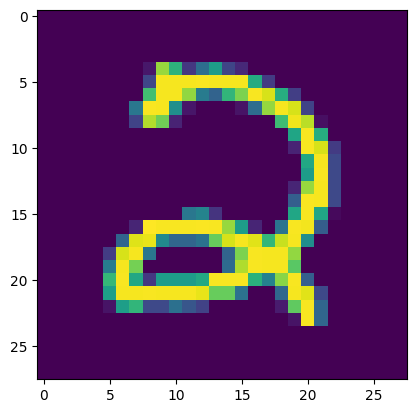

In [2]:
plot_images(X_test, num_images=7)

We will concatenate all the pixel values for a single image into one 28x28=784 long vector. We will use our KNN classifier again and this time the distance will be the Euclidean distance between those 784-dimensional vectors.

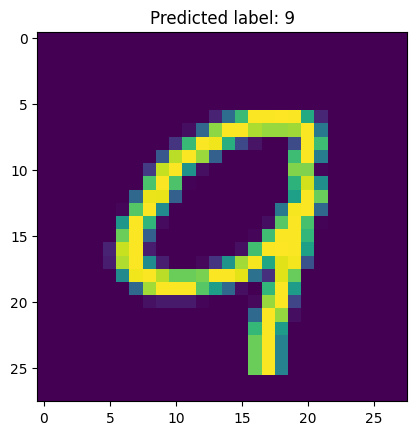

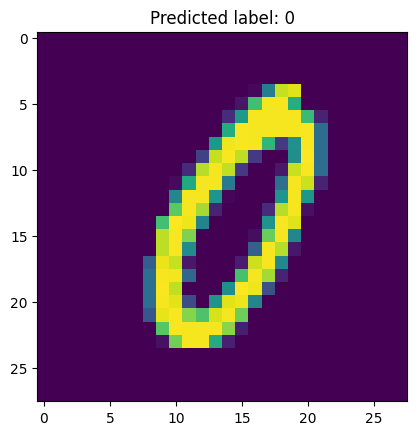

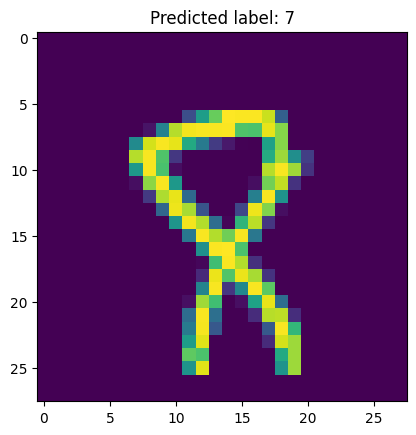

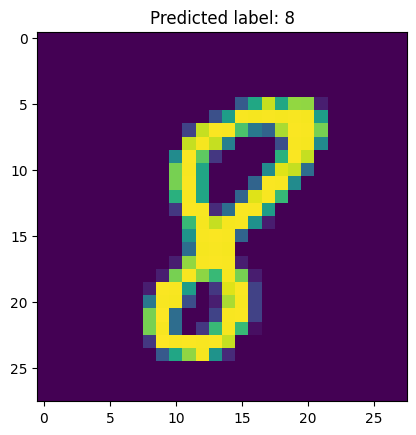

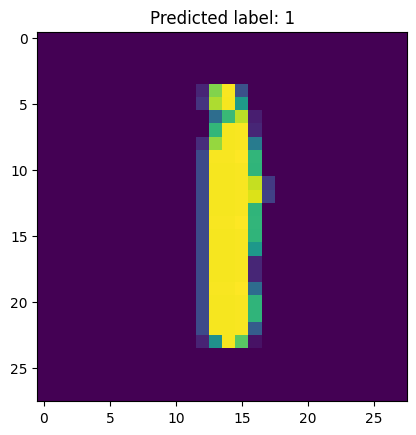

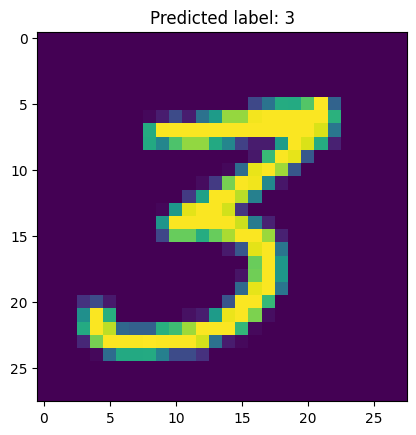

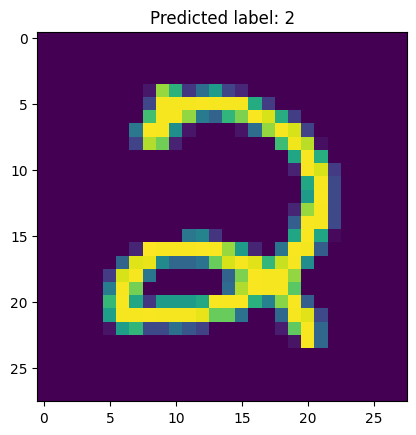

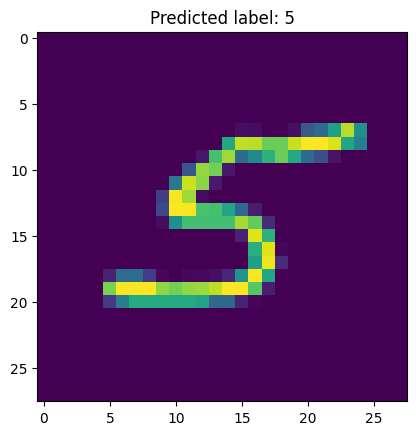

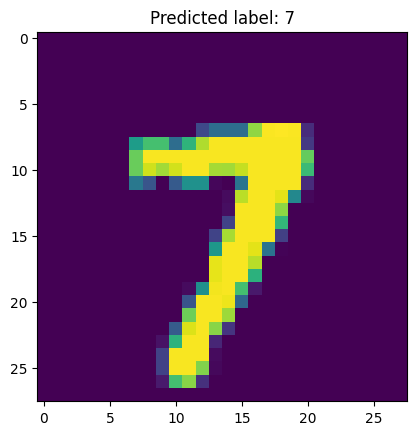

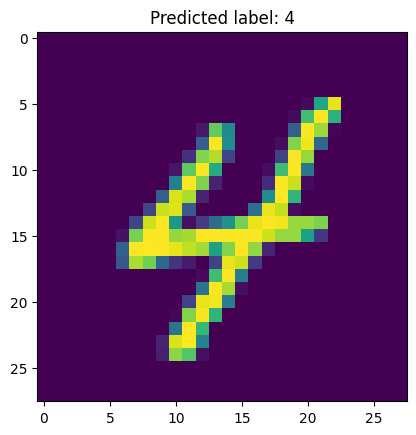

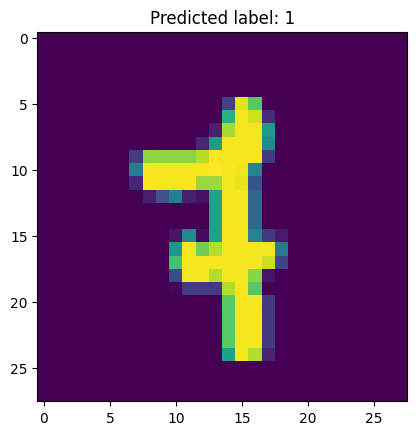

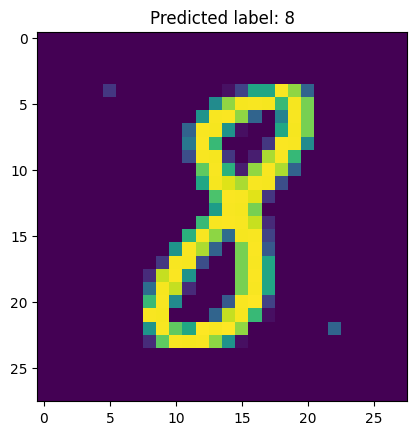

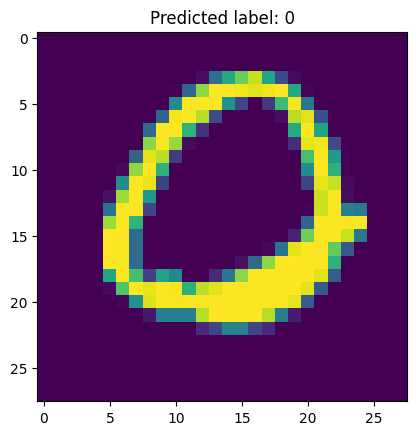

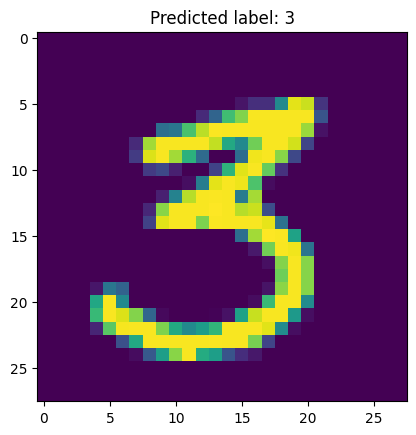

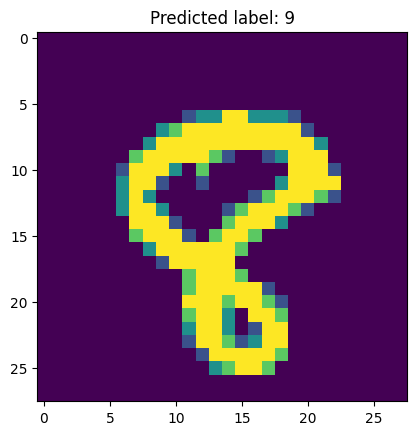

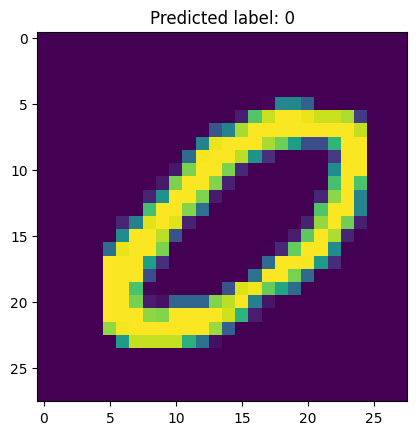

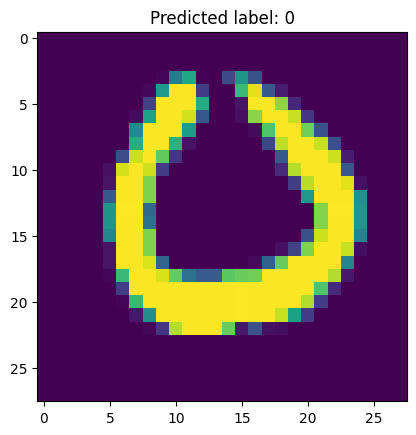

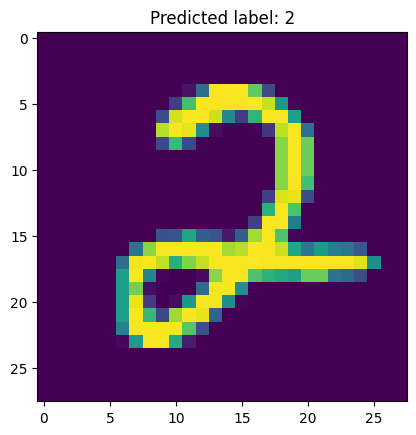

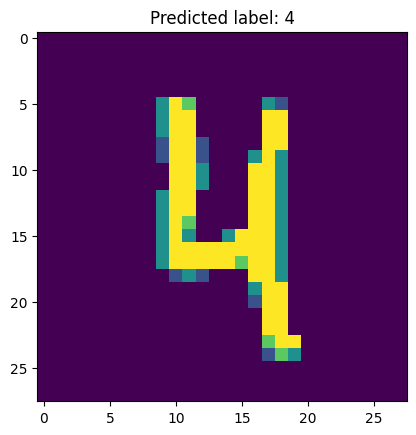

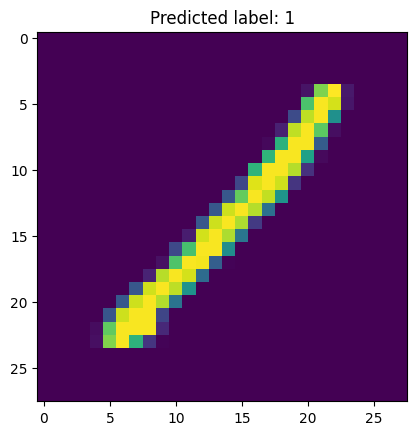

In [7]:
# You can experiment with this and find the values that makes the best predictions
K = 6

# TODO: Replace with your other sorting algorithm functions
digit_predictions = knn(X_train, y_train, X_test, K, 10, merge)

plot_images(X_test, num_images=20, digit_predictions=digit_predictions)